ML INTERN at PRODIGY INFOTECH

Task 1: Implement a linear regression model to predict the prices of houses based on their square footage and the number of bedrooms and bathrooms.

Dataset: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Load and Explore Data

In [ ]:
house = pd.DataFrame(pd.read_csv("train.csv"))

In [ ]:
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
house.shape

(1124, 81)

In [ ]:
house.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1124 entries, 0 to 1457
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1124 non-null   int64  
 1   MSSubClass     1124 non-null   int64  
 2   MSZoning       1124 non-null   object 
 3   LotFrontage    937 non-null    float64
 4   LotArea        1124 non-null   int64  
 5   Street         1124 non-null   object 
 6   Alley          86 non-null     object 
 7   LotShape       1124 non-null   object 
 8   LandContour    1124 non-null   object 
 9   Utilities      1124 non-null   object 
 10  LotConfig      1124 non-null   object 
 11  LandSlope      1124 non-null   object 
 12  Neighborhood   1124 non-null   object 
 13  Condition1     1124 non-null   object 
 14  Condition2     1124 non-null   object 
 15  BldgType       1124 non-null   object 
 16  HouseStyle     1124 non-null   object 
 17  OverallQual    1124 non-null   int64  
 18  OverallCond  

In [ ]:
house.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1124.000000,1124.000000,937.000000,1124.000000,1124.000000,1124.000000,1124.000000,1124.000000,1118.000000,1124.000000,...,1124.000000,1124.000000,1124.000000,1124.000000,1124.000000,1124.000000,1124.000000,1124.000000,1124.000000,1124.000000
mean,727.827402,58.460854,67.439701,9001.610320,6.079181,5.572954,1971.353203,1985.483986,91.892665,411.483986,...,84.302491,45.066726,21.598754,3.016904,14.134342,0.512456,37.459075,6.333630,2007.801601,171011.542705
std,421.919903,42.423650,20.240985,3081.630347,1.273734,1.098456,31.714959,20.838964,156.458612,406.746462,...,115.493633,63.636840,58.563526,28.587848,53.668607,17.180640,488.052301,2.703497,1.322710,58739.510624
min,1.000000,20.000000,21.000000,1680.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,363.500000,20.000000,57.000000,7200.000000,5.000000,5.000000,1950.000000,1968.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129900.000000
50%,735.500000,50.000000,67.000000,9099.000000,6.000000,5.000000,1976.000000,1995.000000,0.000000,378.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160100.000000
75%,1098.250000,70.000000,79.000000,10927.750000,7.000000,6.000000,2002.000000,2004.000000,152.500000,695.000000,...,150.000000,65.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,204000.000000
max,1458.000000,190.000000,182.000000,17104.000000,10.000000,9.000000,2009.000000,2010.000000,1600.000000,1619.000000,...,728.000000,547.000000,386.000000,508.000000,480.000000,576.000000,15500.000000,12.000000,2010.000000,340000.000000


In [ ]:
house.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

Data cleaning

In [ ]:
house.isnull().sum()*100/house.shape[0]

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
                   ...    
MoSold            0.000000
YrSold            0.000000
SaleType          0.000000
SaleCondition     0.000000
SalePrice         0.000000
Length: 81, dtype: float64

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [ ]:
house_cleaned = house.dropna()

In [ ]:
house_cleaned.isnull().sum()*100/house.shape[0]

Id               0.0
MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
                ... 
MoSold           0.0
YrSold           0.0
SaleType         0.0
SaleCondition    0.0
SalePrice        0.0
Length: 81, dtype: float64

Data visualisation

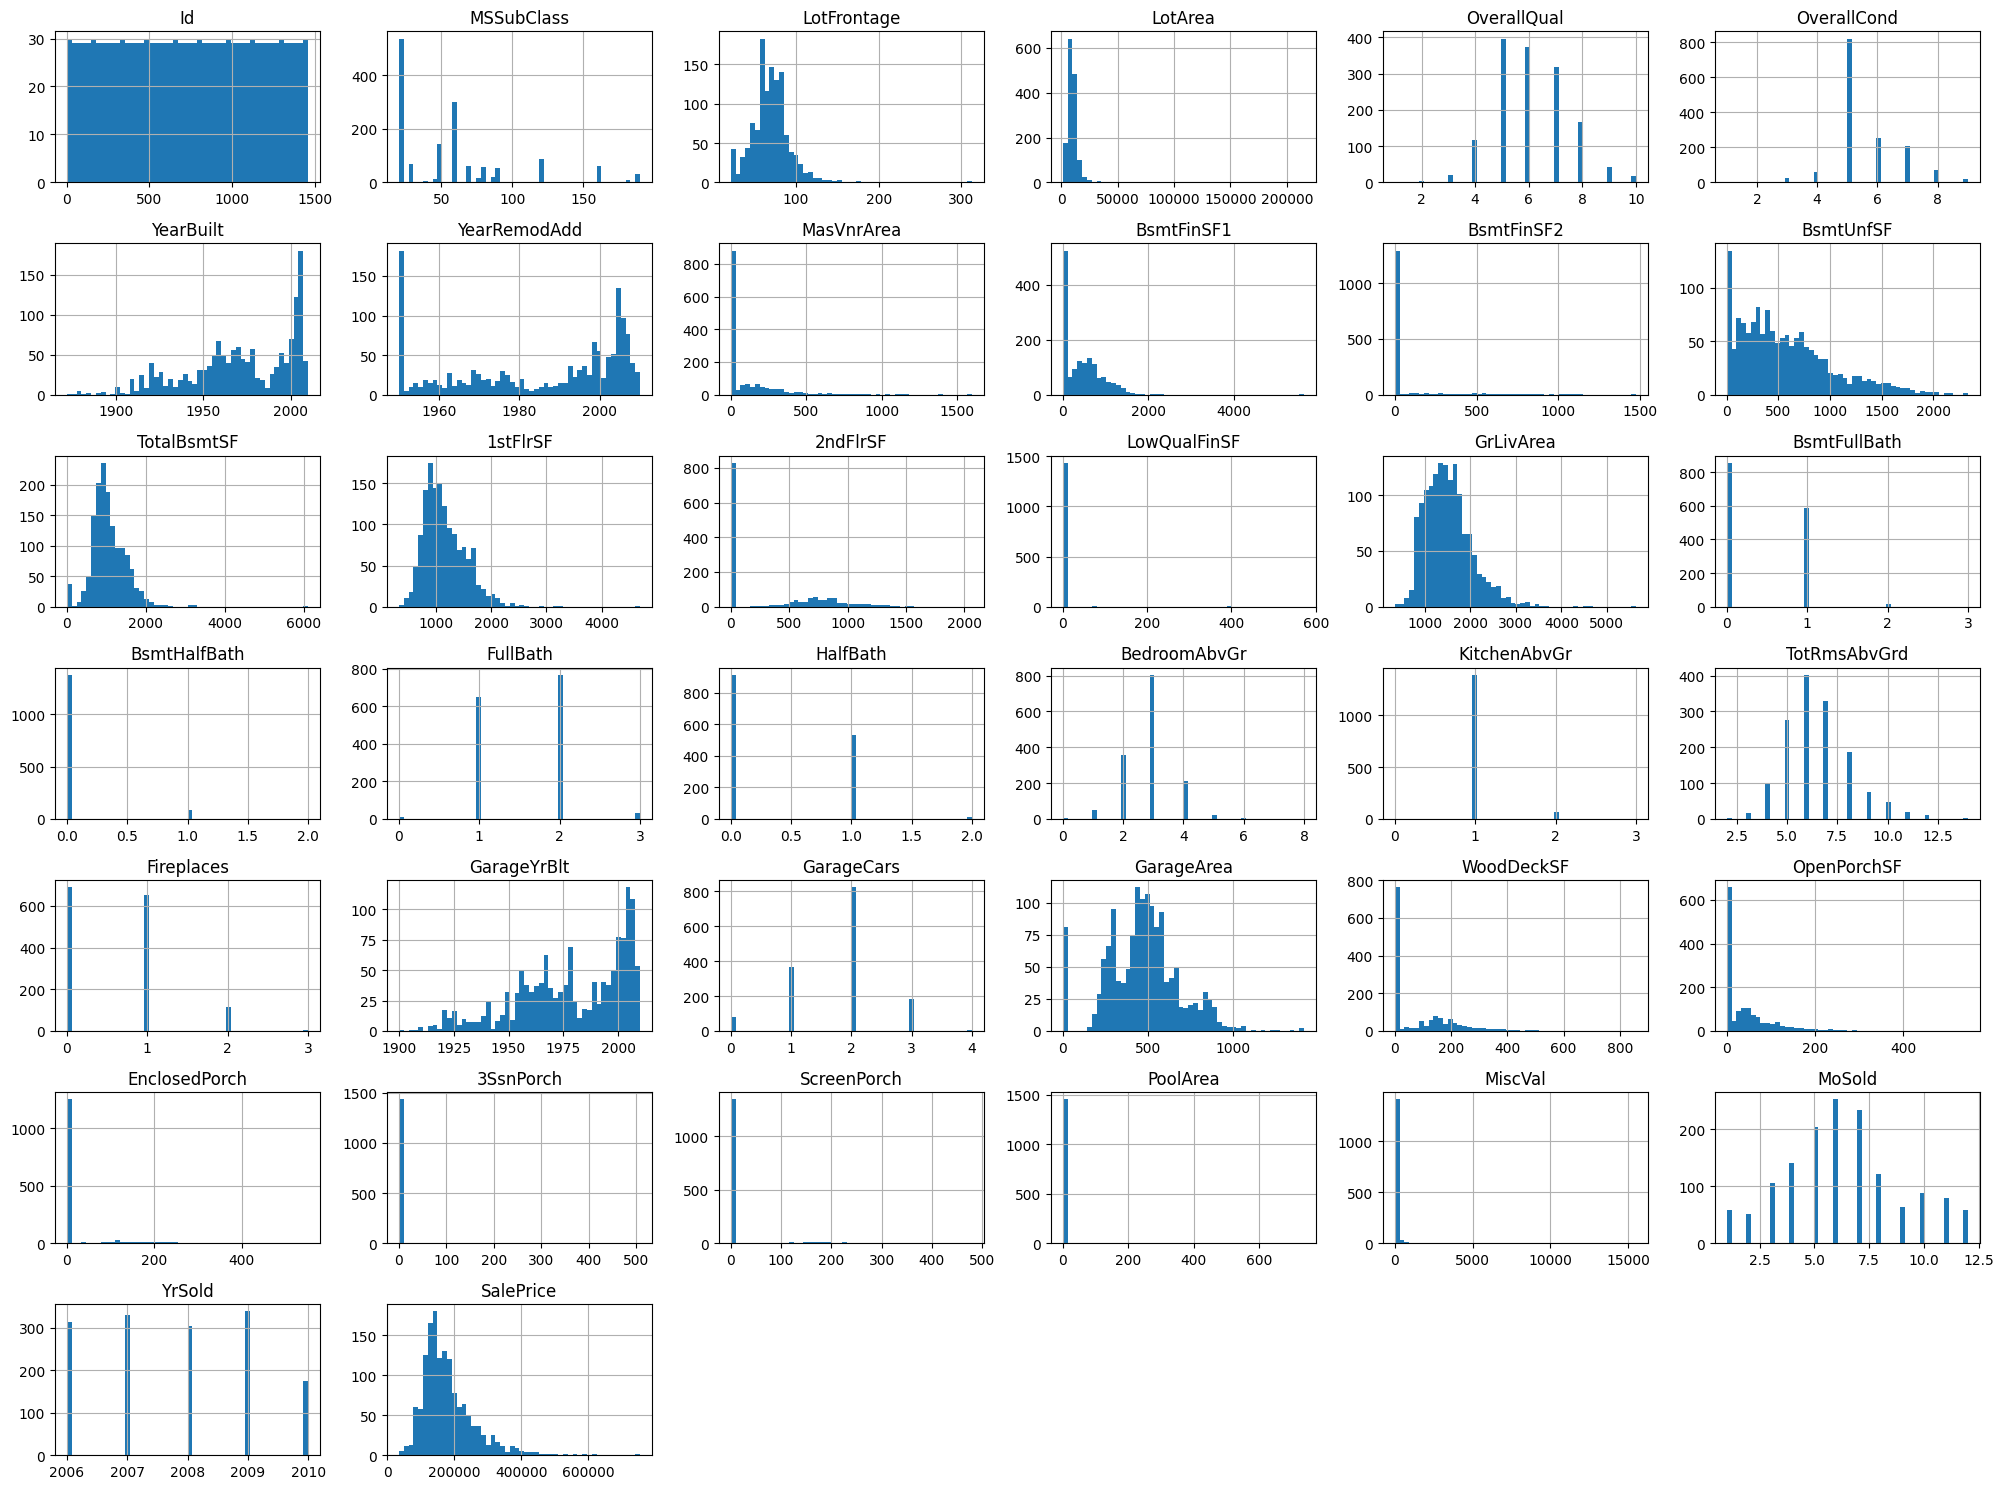

In [ ]:
house.hist(bins=50, figsize=(20, 15))
plt.tight_layout()
plt.show()

In [ ]:
sns.pairplot(house)

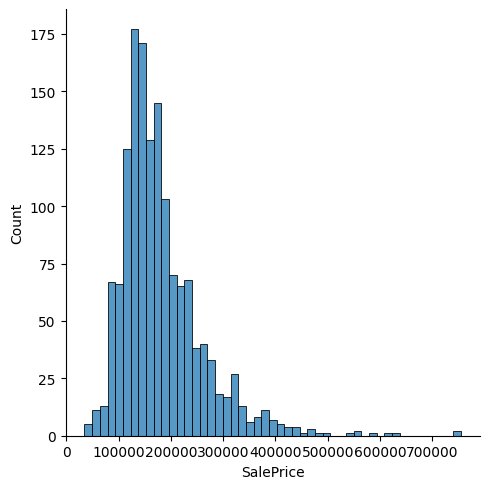

In [ ]:
sns.displot(house['SalePrice'])

Outlier analysis

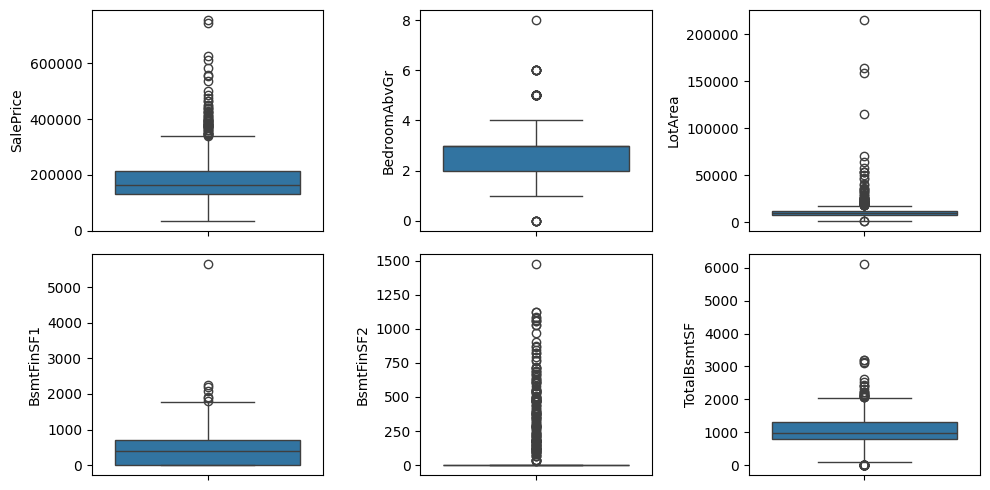

In [ ]:
fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(house['SalePrice'], ax = axs[0,0])
plt2 = sns.boxplot(house['BedroomAbvGr'], ax = axs[0,1])
plt3 = sns.boxplot(house['LotArea'], ax = axs[0,2])

plt4 = sns.boxplot(house['BsmtFinSF1'], ax = axs[1,0])
plt5 = sns.boxplot(house['BsmtFinSF2'], ax = axs[1,1])
plt6 = sns.boxplot(house['TotalBsmtSF'], ax = axs[1,2])
plt.tight_layout()

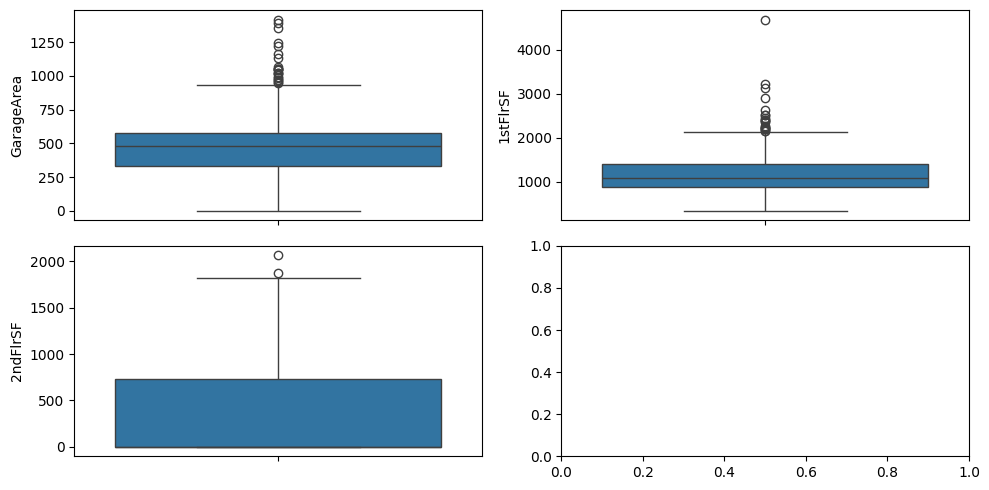

In [ ]:
fig1, axs = plt.subplots(2,2, figsize = (10,5))
plt7 = sns.boxplot(house['GarageArea'], ax = axs[0,0])
plt8 = sns.boxplot(house['1stFlrSF'], ax = axs[0,1])
plt9 = sns.boxplot(house['2ndFlrSF'], ax = axs[1,0])
plt.tight_layout()

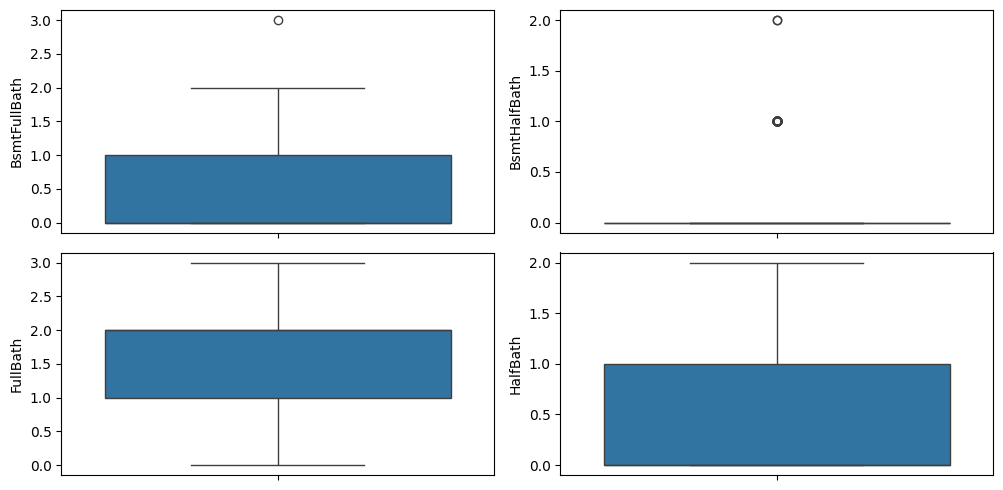

In [ ]:
fig2, axs = plt.subplots(2,2, figsize = (10,5))
plt10 = sns.boxplot(house['BsmtFullBath'], ax = axs[0,0])
plt11= sns.boxplot(house['BsmtHalfBath'], ax = axs[0,1])
plt12= sns.boxplot(house['FullBath'], ax = axs[1,0])
plt13= sns.boxplot(house['HalfBath'], ax = axs[1,1])
plt.tight_layout()

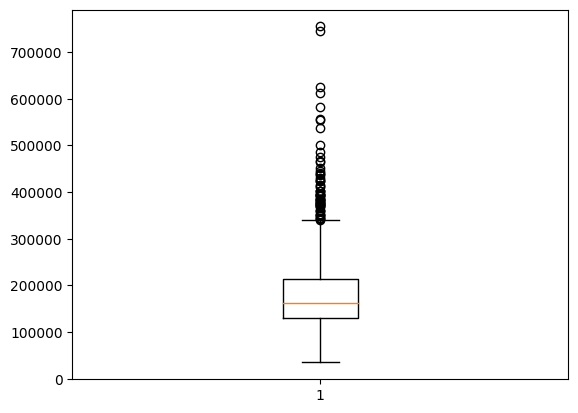

In [ ]:
plt.boxplot(house.SalePrice)
Q1 = house.SalePrice.quantile(0.25)
Q3 = house.SalePrice.quantile(0.75)
IQR = Q3 - Q1
house = house[(house.SalePrice >= Q1 - 1.5*IQR) & (house.SalePrice <= Q3 + 1.5*IQR)]


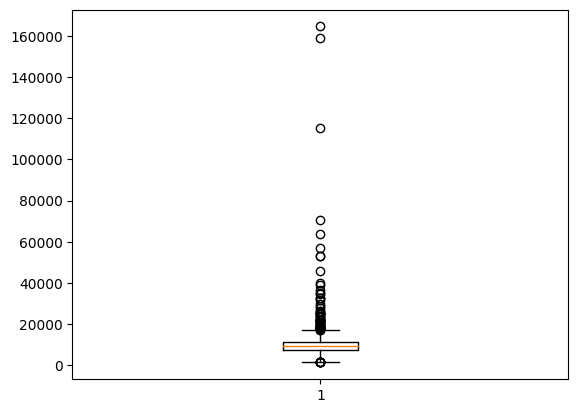

In [ ]:
plt.boxplot(house.LotArea)
Q1 = house.LotArea.quantile(0.25)
Q3 = house.LotArea.quantile(0.75)
IQR = Q3 - Q1
house = house[(house.LotArea >= Q1 - 1.5*IQR) & (house.LotArea <= Q3 + 1.5*IQR)]


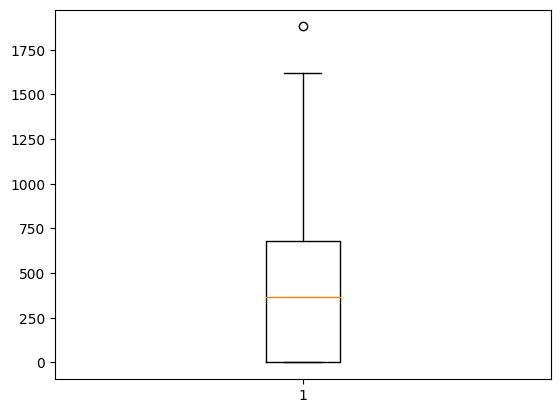

In [ ]:
plt.boxplot(house.BsmtFinSF1)
Q1 = house.BsmtFinSF1.quantile(0.25)
Q3 = house.BsmtFinSF1.quantile(0.75)
IQR = Q3 - Q1
house = house[(house.BsmtFinSF1 >= Q1 - 1.5*IQR) & (house.BsmtFinSF1 <= Q3 + 1.5*IQR)]

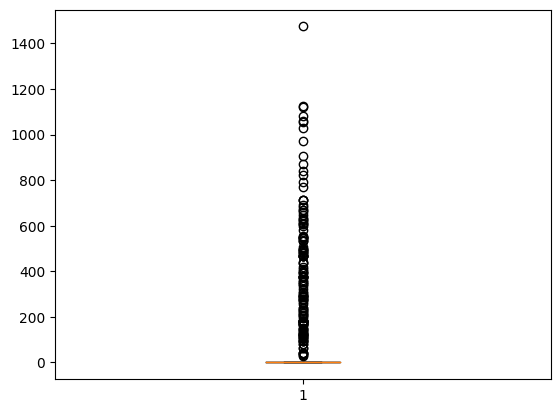

In [ ]:
plt.boxplot(house.BsmtFinSF2)
Q1 = house.BsmtFinSF2.quantile(0.25)
Q3 = house.BsmtFinSF2.quantile(0.75)
IQR = Q3 - Q1
house = house[(house.BsmtFinSF2 >= Q1 - 1.5*IQR) & (house.BsmtFinSF2 <= Q3 + 1.5*IQR)]

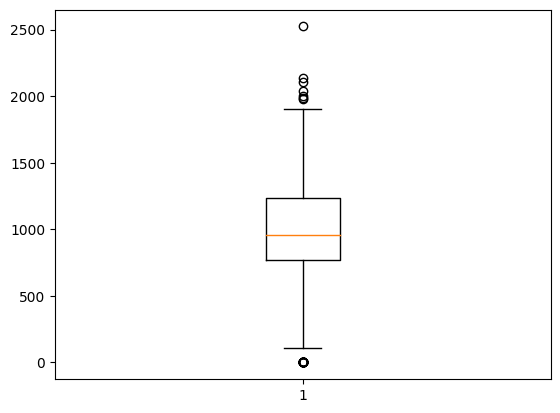

In [ ]:
plt.boxplot(house.TotalBsmtSF)
Q1 = house.TotalBsmtSF.quantile(0.25)
Q3 = house.TotalBsmtSF.quantile(0.75)
IQR = Q3 - Q1
house = house[(house.TotalBsmtSF >= Q1 - 1.5*IQR) & (house.TotalBsmtSF <= Q3 + 1.5*IQR)]

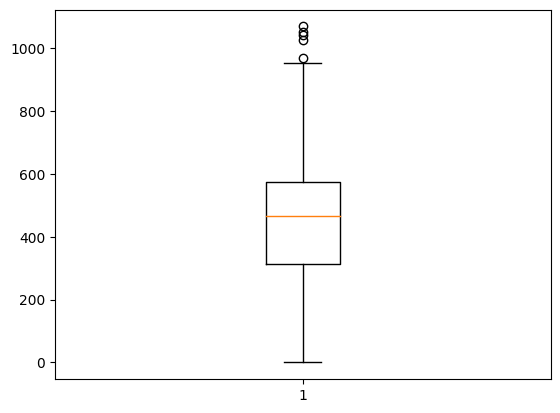

In [ ]:
plt.boxplot(house.GarageArea)
Q1 = house.GarageArea.quantile(0.25)
Q3 = house.GarageArea.quantile(0.75)
IQR = Q3 - Q1
house = house[(house.GarageArea >= Q1 - 1.5*IQR) & (house.GarageArea <= Q3 + 1.5*IQR)]

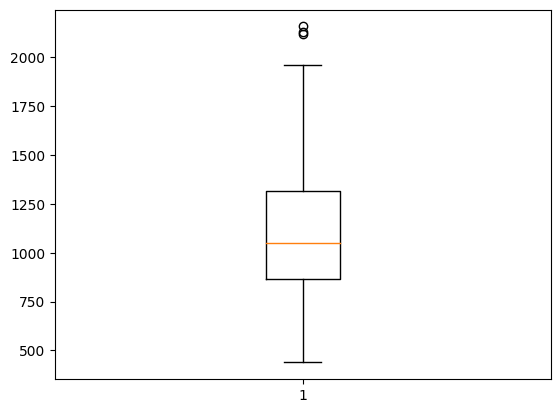

In [ ]:
plt.boxplot(house['1stFlrSF'])
Q1 = house['1stFlrSF'].quantile(0.25)
Q3 = house['1stFlrSF'].quantile(0.75)
Q1 = house['1stFlrSF'].quantile(0.25)
IQR = Q3 - Q1
house = house[(house['1stFlrSF'] >= Q1 - 1.5*IQR) & (house['1stFlrSF'] <= Q3 + 1.5*IQR)]

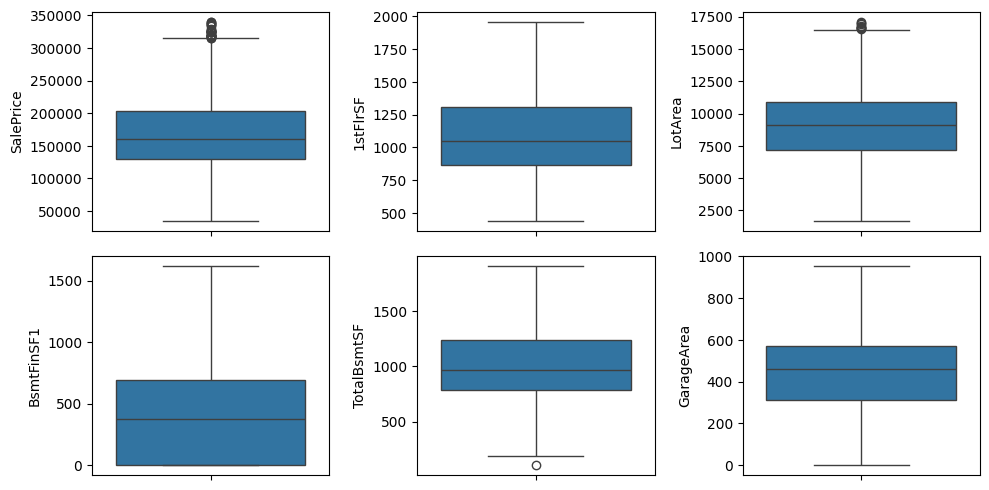

In [ ]:
fig3, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(house['SalePrice'], ax = axs[0,0])
plt2 = sns.boxplot(house['1stFlrSF'], ax = axs[0,1])
plt3 = sns.boxplot(house['LotArea'], ax = axs[0,2])

plt4 = sns.boxplot(house['BsmtFinSF1'], ax = axs[1,0])
plt5 = sns.boxplot(house['TotalBsmtSF'], ax = axs[1,1])
plt6 = sns.boxplot(house['GarageArea'], ax = axs[1,2])
plt.tight_layout()

Feature Selection and Data Preparation

In [ ]:
#Input feature
x = house[['BedroomAbvGr', 'LotArea', 'BsmtFinSF1','BsmtFinSF2', 'TotalBsmtSF','GarageArea','1stFlrSF','2ndFlrSF','BsmtFullBath','FullBath','BsmtHalfBath','HalfBath']]
#Output feature
y = house['SalePrice']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)

Training a Linear Regression model

In [ ]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [ ]:
print(lm.intercept_)

-11167.050846727914


In [ ]:
coeff_df = pd.DataFrame(lm.coef_,x.columns,columns=['Coefficient'])
coeff_df

,Coefficient
BedroomAbvGr,-1.388660e+04
LotArea,2.055259e+00
BsmtFinSF1,1.378404e+01
BsmtFinSF2,2.645493e-10
TotalBsmtSF,6.038462e+01
GarageArea,6.183394e+01
1stFlrSF,4.136390e+01
2ndFlrSF,5.813681e+01
BsmtFullBath,4.899551e+03
FullBath,2.193818e+04


In [ ]:
# prompt: Using dataframe coeff_df: histogram

import altair as alt
chart = alt.Chart(coeff_df).mark_bar().encode(x='Coefficient:Q').properties(width=600)
chart


alt.Chart(...)

Predictions

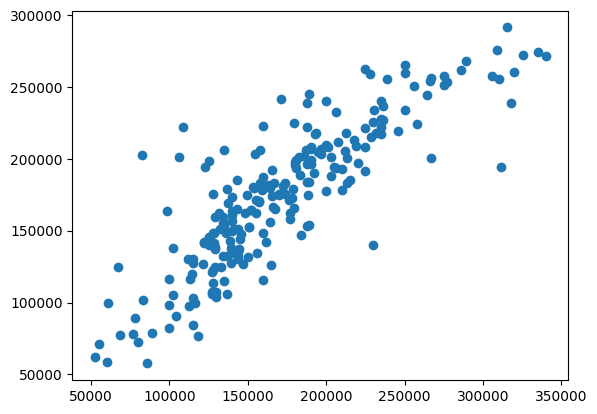

In [ ]:
predictions = lm.predict(x_test)
plt.scatter(y_test,predictions)

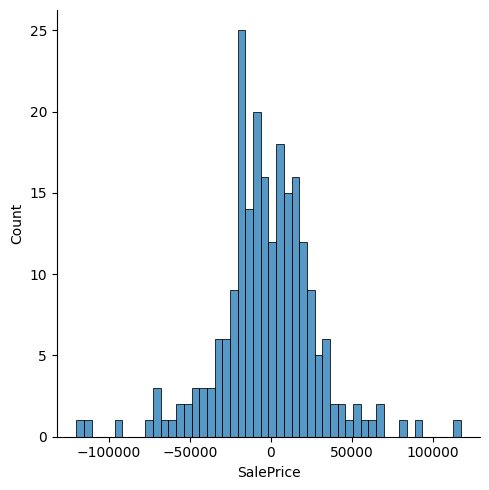

In [ ]:
sns.displot((y_test-predictions),bins=50);

Evaluation metrices

In [ ]:
from sklearn import metrics

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 21960.196883042943
MSE: 917112506.4586926
RMSE: 30283.865447770906
